In [111]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.core import datetools
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

In [112]:
data=pd.read_csv("all.csv")

In [113]:
data.head()


,Date,Adj_Close,Volume,Oil_price,Adj_Close_SP
0,2009-05-01,31.726078,5508800,53.20,877.520020
1,2009-05-04,32.472832,5269800,54.47,907.239990
2,2009-05-05,33.219616,7683900,53.84,903.799988
3,2009-05-06,34.362438,7930300,56.34,919.530029
4,2009-05-07,33.841553,7106700,56.71,907.390015


In [114]:
event_1='2018-10-29'
event_2='2019-03-10'

In [115]:
data['Date']=pd.to_datetime(data["Date"])

In [116]:
data["after_1"]=np.where((data.Date>=event_1)&(data.Date<='2018-11-1'),1,0)
data["after_2"]=np.where((data.Date>=event_2)&(data.Date<='2019-03-13'),1,0)

In [117]:
data=data.set_index(data.Date)
data=data.drop("Date",axis=1)

In [118]:
data['Y'] = data['Adj_Close'].diff(periods=1)
data['Oil_diff'] = data['Oil_price'].diff(periods=1)
data.dropna(inplace=True)

In [119]:
X_multi=data.drop(['Adj_Close','Y','Volume','Adj_Close_SP',"Oil_price"], axis=1)
Y_target=data.Y

In [120]:
X_multi=sm.tools.tools.add_constant(X_multi, prepend=True, has_constant='skip')

In [121]:
# OLS Regression
mod = sm.OLS(Y_target, X_multi)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     50.59
Date:                Mon, 13 May 2019   Prob (F-statistic):           9.65e-32
Time:                        18:52:02   Log-Likelihood:                -6100.7
No. Observations:                2514   AIC:                         1.221e+04
Df Residuals:                    2510   BIC:                         1.223e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1537      0.055      2.806      0.0

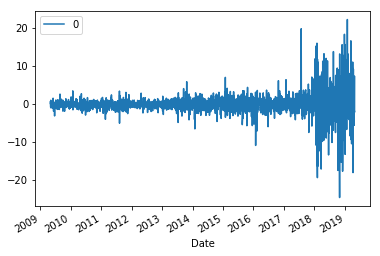

                  0
count  2.514000e+03
mean  -2.137422e-17
std    2.739984e+00
min   -2.452569e+01
25%   -8.269281e-01
50%   -7.471275e-02
75%    7.621320e-01
max    2.225773e+01


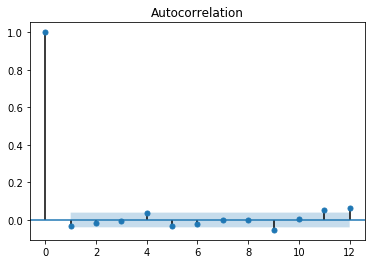

In [122]:
residuals = DataFrame(res.resid)
residuals.plot()
plt.show()
print(residuals.describe())
plot_acf(residuals,lags=12)
plt.show()
# the plot shows that there is significant serial correlation at lag